In [99]:
# reference: https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

In [100]:
# imports

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [101]:
def generate_data(number_of_rows):
    
    """
        generates a DataFrame of with columns x, y, and label and number of rows equal to number_of_rows.
        data generated with make_blobs from numpy.datasets

        Parameters:
            number_of_rows (int): the number of rows to b generated

        Returns:
            (DataFrame): columns - x, y, and label; rows - number_of_rows
    """
    
    random.seed()
    columns = ['x', 'y', 'label']
    points, labels = datasets.make_blobs(
            n_samples = number_of_rows,
            n_features = 2,
            centers = 2,
            cluster_std = 1 + random.random() * 4,
            random_state = random.randint(1,100))
    df = pd.DataFrame(list(zip(points[:,0], points[:,1], labels)), columns=columns)
    return df

In [102]:
clusters_df = generate_data(100)
clusters_df.head()

,x,y,label
0,0.369131,-1.033449,0
1,-2.619075,-5.163763,1
2,-0.337991,1.371447,0
3,0.132741,-2.155942,0
4,1.129488,-7.001840,1


In [103]:
def plot_df(df):

    """
        plots the dataframe generated in generate_data() with color coded clusters

        Parameters:
            df (DataFrame): DataFrame to be plotted. Should be generated with generate_data(). Columns must be [feature, feature, label].

        Returns:
            (None)
    """

    plt.scatter(
        df[df.iloc[:,2] == 0].iloc[:,0], 
        df[df.iloc[:,2] == 0].iloc[:,1], 
        edgecolors='white', 
        marker='o',
        color='g', 
        s=60,
        label='0'
    )
    plt.scatter(
        df[df.iloc[:,2] == 1].iloc[:,0], 
        df[df.iloc[:,2] == 1].iloc[:,1], 
        edgecolors='white', 
        marker='s',
        color='b',
        s=60,
        label='1'
    )
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.legend()
    plt.title(
        ''
    )
    _w = 0.2
    plt.xlim(pad_range(_w, {'max': df.iloc[:,0].max(), 'min': df.iloc[:,0].min()}))
    plt.ylim(pad_range(_w, {'max': df.iloc[:,1].max(), 'min': df.iloc[:,1].min()}))
    deviations= []
    for i in range(4):
        p_label = math.floor(i/2)
        p_feature = i % 2
        deviations.append(clusters_df[clusters_df.iloc[:,2] == p_label].iloc[:,p_feature].std())
    plt.title(f'avera cluster deviation: {sum(deviations)/len(deviations):.2f}')


def pad_range(pad_width, _range):

    """
        padds a range with +- pad_width. 
        used to set pyplot.xlim() and pyplot.ylim() axis ranges.

        Parameters:
            pad_width (float): percent of the range to add to each side of the plot
            _range (dictionary): max and min of the range
        
        Returns:
            (list): [_min - _pad, _max + _pad]
    """

    _max = _range['max']
    _min = _range['min']
    _delta = _max - _min
    _pad = pad_width * _delta
    return [_min - _pad, _max + _pad]

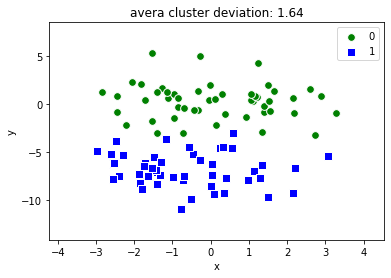

In [104]:
plot_df(clusters_df)

In [105]:
def perceptron(data, epochs=10, learning_rate=0.1):
    
    """
        perceptron training algorithm.
        calls activation_function() for neuron activation.

        Parameters:
            data (DataFrame): data to train the perceptron on. Needs to be in the format [feature, feature, label]
            epochs (int, optional, default=10): number of training cycles
            learning_rate (float, optional, default=0.1): determines the magnitude of the offset applied to theta on a failed prediction

        Returns:
            (list): trained theta. give to predict() along with a point to make a prediction.
    """

    labels = data.iloc[:,-1]
    samples = data.iloc[:,:-1]
    sample_count = samples.shape[0]
    feature_count  = samples.shape[1]
    theta = np.zeros((feature_count + 1, 1))
    misclassified_counts = [0 for _ in range(epochs)]
    threashold = 0.0
    active = 1.0
    inactive = 0.0

    for e in range(epochs):
        for i, sample_i in enumerate(samples.iterrows()):
            sample_i = np.array([sample_i[1][0], sample_i[1][1]])
            sample_i = np.insert(sample_i, 0, 1).reshape(-1, 1)
            dot = np.squeeze(np.dot(sample_i.T, theta))
            prediction = inactive
            if dot > threashold: prediction = active
            if prediction - labels[i] == 0: continue 
            theta += learning_rate * sample_i * (labels[i] - prediction)
            misclassified_counts[e] += 1

    return theta, misclassified_counts

In [106]:
theta, counts = perceptron(clusters_df)

In [107]:
_theta_df = pd.DataFrame(theta, columns=['final_theta'])
_theta_df

,final_theta
0,-2.400000
1,-0.019353
2,-0.973672


In [108]:
_misclassifications_df = pd.DataFrame().from_dict({'epoch':[x for x in range(len(counts))], 'misclassifications': counts})
_misclassifications_df

,epoch,misclassifications
0,0,16
1,1,8
2,2,5
3,3,8
4,4,5
5,5,6
6,6,5
7,7,5
8,8,2
9,9,6


In [109]:
def plot_decision_boundary(data, theta):
    
    """
        scatterplot of data with decision boundary

        Parameters:
            data (DataFrame): dataset perceptron was trained on.
                needs to be in the form [feature, feature, label]
            theta (list): resultant theta from perceptron training

        Returns:
            (None): just draws the plot
    """

    if theta[2] == 0: return

    plot_df(data)

    feature_1_range = np.array([data.iloc[:,0].min(), data.iloc[:,0].max()])
    slope = -theta[1]/theta[2]
    intercept = -theta[0]/theta[2]
    feature_2_range = slope * feature_1_range + intercept

    plt.plot(
        feature_1_range,
        feature_2_range,
        linewidth=2,
        color='red',
        label='decision boundary'
    )
    plt.legend()

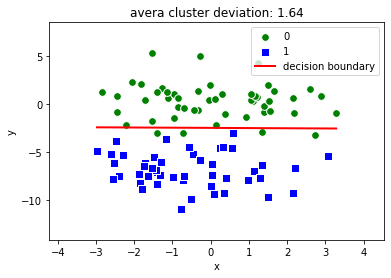

In [110]:
plot_decision_boundary(clusters_df, theta)